**Imports**

In [1]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

/home/rob/miniconda3/envs/goggle10/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-03-07 14:19:58,886 - Created a temporary directory at /tmp/tmpj9q6q5w5
2023-03-07 14:19:58,887 - Writing /tmp/tmpj9q6q5w5/_remote_module_non_scriptable.py


**Load data**

In [2]:
dataset = "ecoli"
X = pd.read_csv("../data/ecoli.csv")
ind = list(range(len(X.columns)))
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.027759,0.122599,0.264658,0.153671,-0.043405,-0.542246,0.619729,0.084389,-0.033762,0.077002,...,-1.156587,1.542883,-0.043889,-0.338571,-0.430860,-0.336886,-0.222453,0.315515,0.629529,0.488032
1,0.645966,-1.182445,-0.297893,-0.958127,-1.348025,0.239957,0.669959,-2.574957,-1.916479,-2.269440,...,0.473894,-0.614861,-2.270004,-1.746693,-1.686743,-2.147293,-2.143699,-2.509647,-2.754116,-2.406968
2,-0.878432,0.415826,-0.418150,0.188152,0.720372,-0.339575,0.828943,0.127842,1.275507,1.133740,...,1.014847,-1.652255,0.251795,0.320190,0.420012,0.150618,-0.217249,0.413813,0.236786,-0.205489
3,-0.458864,0.296419,0.381965,-0.282977,1.698835,0.027809,-1.067956,-2.038131,-0.197604,-0.155425,...,-0.401261,1.322398,-0.196608,-0.457251,-0.027710,-0.278149,0.004377,-0.212255,-0.489394,-0.719893
4,-0.687974,0.685775,0.989306,0.398356,1.347598,-1.213816,-0.896065,-0.525506,-0.363537,0.036631,...,2.540371,-1.535672,-1.128562,-0.764837,-1.085189,-1.031513,-1.461310,-1.059138,-0.743434,-0.567452


**Fit model**

In [3]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=0.1,
    learning_rate=0.01,
    seed=0,
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=46, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=46, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=46, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=64, out=32, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=32, out=1, normalization=both, activation=None)
    )
  )
)

In [4]:
gen.fit(X_train)

[Epoch 100/1000, patience  0] train: 21.204, val: 20.868
[Epoch 200/1000, patience  5] train: 15.263, val: 15.715
[Epoch 300/1000, patience  9] train: 14.284, val: 14.707
Training terminated after 398 epochs


**Evaluate synthetic data**

In [5]:
X_synth = gen.sample(X_test)
X_synth.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.375861,-0.753224,-0.910092,-0.973805,-0.919174,0.574520,-0.055570,-0.517778,-2.047850,-1.595053,...,-0.187476,-1.002960,-1.051643,-0.857759,-0.866849,-1.007226,-0.946558,-1.017826,-1.085150,-1.166231
1,-0.638337,-0.977382,-0.993201,-1.056979,-1.168747,-1.066886,-1.937524,-0.715550,-2.353503,-1.654174,...,-1.027959,-1.410679,-1.641957,-1.490051,-1.513569,-1.524874,-1.430482,-1.584148,-1.861670,-1.969629
2,-0.518034,0.654877,0.655639,0.698569,0.629066,0.657418,1.057090,0.290978,0.814816,0.570631,...,0.362330,1.063619,0.214605,-0.177581,-0.128548,0.225373,0.164186,0.159636,0.145063,0.157723
3,-0.532532,0.482868,0.302881,0.224226,0.364107,-0.344793,0.746106,0.213283,1.158357,1.104599,...,-1.221648,1.099884,0.561035,0.392876,0.409284,0.495321,0.553734,0.486493,0.411364,0.364535
4,-1.517934,-1.613787,-1.463419,-1.524580,-1.481101,-1.508846,-1.804669,-1.084534,-1.351065,-0.953548,...,-0.904063,-1.617150,-1.168051,-1.015725,-1.038642,-1.129284,-1.031043,-1.143123,-1.308230,-1.364228


In [6]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="ftsJ",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="ftsJ",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

Quality: 0.645
Detection: 0.760
Performance on real: 0.975, on synth: 0.965, diff: 0.010


**Generate TSNE plots**

In [7]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "ftsJ"], axis=1)

In [8]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

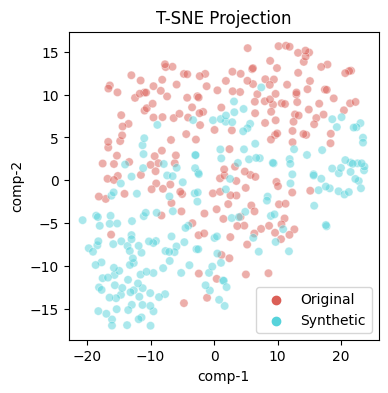

In [9]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

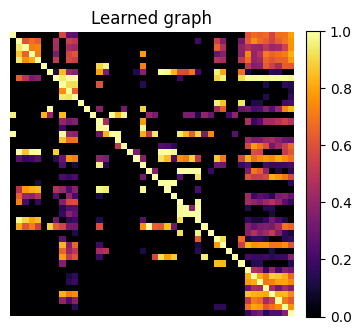

In [10]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()

In [11]:
adj_df = pd.DataFrame(adj_matrix)
adj_df.to_csv("../data/ecoli_adj_matrix.csv")